In [1]:
# Author: aarontanx
# Cases and Vaccination Prediction

In [17]:
import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import KFold
from matplotlib.pyplot import figure

In [18]:
print('Last update:', datetime.datetime.now())

Last update: 2021-09-10 17:16:54.690562


In [19]:
df_Case_My = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv')
df_Vac_My = pd.read_csv('https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/vaccination/vax_malaysia.csv')

In [41]:
dfVacCase = df_Case_My.merge(df_Vac_My, on=['date'])

In [42]:
dfVacCase['date'] = pd.to_datetime(dfVacCase['date'])
dfVacCase['days_since'] = (dfVacCase['date'] - dfVacCase['date'].min())  / np.timedelta64(1,'D')

In [43]:
dfVacCase.columns

Index(['date', 'cases_new', 'cases_import', 'cases_recovered',
       'cluster_import', 'cluster_religious', 'cluster_community',
       'cluster_highRisk', 'cluster_education', 'cluster_detentionCentre',
       'cluster_workplace', 'daily_partial', 'daily_full', 'daily',
       'cumul_partial', 'cumul_full', 'cumul', 'pfizer1', 'pfizer2',
       'sinovac1', 'sinovac2', 'astra1', 'astra2', 'cansino', 'pending',
       'days_since'],
      dtype='object')

In [88]:
dfVacCase.rename(columns={'daily':'daily_vaccination_count'}, inplace=True)

In [89]:
dfCurrent = dfVacCase[['date', 'days_since', 'daily_vaccination_count', 'cases_new']].copy()
dfCurrent['status'] = 'current'

In [105]:
# Model for new vaccine count
param_grid = {'C': [0.001,0.01,0.1,1, 10, 100], 'gamma': [100,10,1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

X = dfCurrent[['days_since']] #, 'cases_new', 'cases_recovered']]
y = dfCurrent['daily_vaccination_count']

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=[(slice(None), slice(None))])
grid.fit(X,y)
param = grid.best_params_

Fitting 1 folds for each of 108 candidates, totalling 108 fits
[CV] END .....................C=0.001, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=100, kernel=poly; total time=   0.0s
[CV] END .................C=0.001, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=0.001, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..................C=0.001, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.001, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...................C=0.001, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .................C=0.001, gamma=0.1, 

[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s


In [106]:
forecastDays100 = [i for i in dfVacCase['days_since'].max()+range(365)]
forecastDate100 = [dfVacCase['date'].max() + datetime.timedelta(days=x) for x in range(365)]

dfPredict = pd.DataFrame()
dfPredict['days_since'] = pd.Series(forecastDays100)
dfPredict['date'] = pd.Series(forecastDate100)

X = dfPredict[['days_since']]

dfPredict['daily_vaccination_count'] = grid.predict(X)

In [107]:
# Model for new case

X = dfCurrent[['days_since', 'daily_vaccination_count']] #, , 'cases_recovered']]
y = dfCurrent['cases_new']

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=[(slice(None), slice(None))])
grid.fit(X,y)
param = grid.best_params_

Fitting 1 folds for each of 108 candidates, totalling 108 fits
[CV] END .....................C=0.001, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=100, kernel=poly; total time=   0.0s
[CV] END .................C=0.001, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=0.001, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..................C=0.001, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.001, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...................C=0.001, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .................C=0.001, gamma=0.1, 

[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s


In [108]:
X = dfPredict[['days_since', 'daily_vaccination_count']] #, 'cases_new', 'cases_recovered']]

dfPredict['cases_new'] = grid.predict(X)
dfPredict['status'] = 'prediction'

dfCombined = dfCurrent.append(dfPredict)

In [114]:
dfCombined

,date,days_since,daily_vaccination_count,cases_new,status
0,2021-02-24,0.0,60,3545,current
1,2021-02-25,1.0,1145,1924,current
2,2021-02-26,2.0,4096,2253,current
3,2021-02-27,3.0,6716,2364,current
4,2021-02-28,4.0,6704,2437,current
...,...,...,...,...,...
360,2022-09-04,557.0,574515,24599,prediction
361,2022-09-05,558.0,574515,24599,prediction
362,2022-09-06,559.0,574515,24599,prediction
363,2022-09-07,560.0,574515,24599,prediction


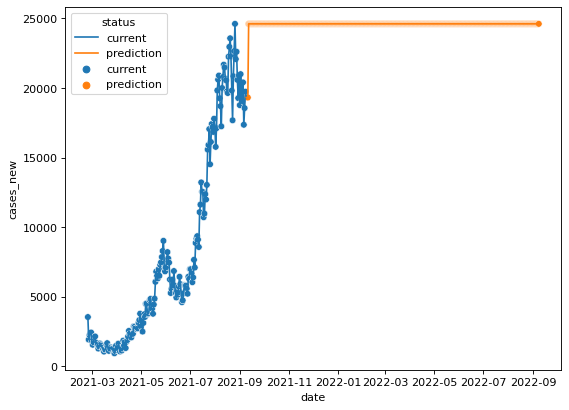

In [112]:
figure(figsize=(8, 6), dpi=80)

sns.scatterplot(data = dfCombined, x = 'date', y='cases_new', hue='status')
sns.lineplot(data = dfCombined, x = 'date', y='cases_new', hue = 'status')

plt.show()

<AxesSubplot:xlabel='date', ylabel='cases_new'>

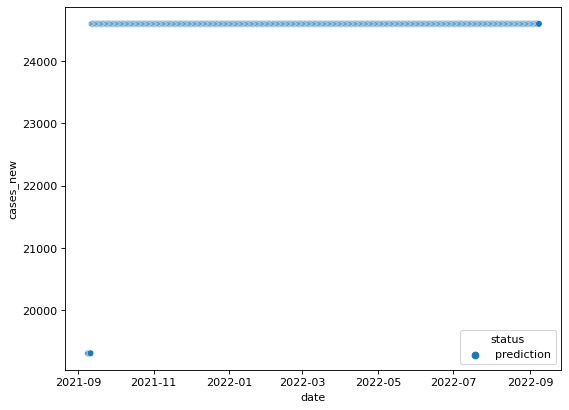

In [113]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data = dfCombined[dfCombined['status'] == 'prediction'], x = 'date', y='cases_new', hue='status')

<AxesSubplot:xlabel='date', ylabel='cases_new'>

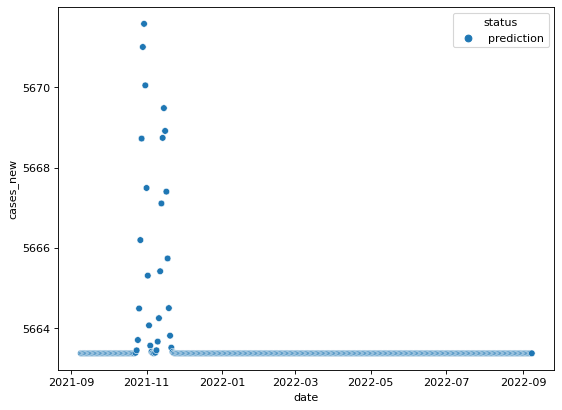

In [168]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data = dfCombined[dfCombined['status'] == 'prediction'], x = 'date', y='cases_new', hue='status')

In [16]:
## Regress daily vaccination count

model = 'svm'
param['kernel'] = 'rbf'
# SVR(kernel='rbf', C=100, gamma=0.1) #, epsilon=.1)


dfCurrent = dfVacCase[['days_since', 'date', 'cases_new', 'daily_vaccination_count']].copy()
dfCurrent['status'] = 'current'

forecastDays100 = [i for i in dfVacCase['days_since'].max()+range(365)]
forecastDate100 = [dfVacCase['date'].max() + datetime.timedelta(days=x) for x in range(365)]

dfPredict = pd.DataFrame()
dfPredict['days_since'] = pd.Series(forecastDays100)
dfPredict['date'] = pd.Series(forecastDate100)
X = dfVacCase['days_since']
y = dfVacCase['daily_vaccination_count']

param = svc_param_selection(X.values.reshape(-1, 1), y.values.ravel())
param['kernel'] = 'rbf'
print("Best Param: ", str(param))

result = regression(X, y, model = model, param = param)
x = dfPredict['days_since']
predictionResult = result.predict(x.values.reshape(-1, 1)).reshape(-1).tolist()


# Forecast daily vaccination count
dfPredict['daily_vaccination_count'] = pd.Series(predictionResult)

X = dfVacCase[['days_since', 'daily_vaccination_count']]
y = dfVacCase['cases_new']

param = svc_param_selection(X.values, y.values.ravel())
param['kernel'] = 'rbf'
print("Best Param: ", str(param))

result = regression(X, y, model= model, param = param)

x1 = dfPredict[['days_since', 'daily_vaccination_count']]

predictionResult = result.predict(np.array(x1)).reshape(-1).tolist()
dfPredict['cases_new'] = pd.Series(predictionResult)
dfPredict['status'] = 'prediction'

dfCombined = dfCurrent.append(dfPredict)

x1 = dfCombined[['days_since', 'daily_vaccination_count']]
dfCombined['prediction_case'] = pd.Series(result.predict(np.array(x1)).reshape(-1).tolist())

NameError: name 'param' is not defined

In [ ]:
sns.pairplot(dailyNewCase)

In [ ]:
dfVacCase[['days_since', 'daily_vaccination_count']]

In [ ]:
# Regression vaccination count
def regression(X, y, model='linear', param = None):
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)

    if model == 'ridge':
        model = Ridge(alpha=alpha)
    elif model == 'bayesian':
        model = BayesianRidge()
    elif model == 'svm':
        model = SVR(
            kernel=param['kernel']
            , C=param['C']
            , gamma=param['gamma']
#             , degree=param['degree']
#             , epsilon=param['epsilon']
#             , coef0=param['coef0']
        )
    elif model == 'lasso':
        model = Lasso()
    elif model == 'logistic':
        model = LogisticRegression(max_iter = max_iter)
    elif model == 'decisiontree':
        model = DecisionTreeRegressor(max_depth = max_depth)
    else: model = LinearRegression()

    scores = []
    kfold = KFold(n_splits=3, shuffle=True, random_state=42)
    for i, (train, test) in enumerate(kfold.split(X, y)):
        model.fit(X.iloc[train,:], y.iloc[train,:])
        score = model.score(X.iloc[test,:], y.iloc[test,:])
        scores.append(score)
#     print(scores)
    return(model)

In [ ]:
# Grid Search using SVR
def svc_param_selection(X, y, kernel = 'rbf'):
    Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVR(kernel=kernel), param_grid, cv=[(slice(None), slice(None))])
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_


In [15]:
dfVacCase

,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,...,cumul_full,cumul,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending
0,2021-02-24,3545,1,3331,0.0,0.0,70.0,19.0,0.0,29.0,...,0,60,60,0,0,0,0,0,0,0
1,2021-02-25,1924,6,3752,0.0,1.0,76.0,26.0,0.0,105.0,...,0,1205,1145,0,0,0,0,0,0,0
2,2021-02-26,2253,7,3085,0.0,11.0,140.0,27.0,0.0,95.0,...,0,5301,4096,0,0,0,0,0,0,0
3,2021-02-27,2364,1,3320,0.0,4.0,157.0,6.0,0.0,52.0,...,0,12017,6716,0,0,0,0,0,0,0
4,2021-02-28,2437,1,3251,0.0,0.0,114.0,9.0,0.0,85.0,...,3,18721,6701,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2021-09-05,20396,8,20573,0.0,6.0,447.0,98.0,23.0,41.0,...,15926601,36431562,108274,39217,15994,86078,8460,18997,5075,7863
194,2021-09-06,17352,8,20201,0.0,0.0,204.0,63.0,23.0,71.0,...,16107712,36745313,111538,43203,12683,107666,5578,21747,2171,9165
195,2021-09-07,18547,18,18902,0.0,0.0,592.0,66.0,19.0,74.0,...,16299881,37071789,116581,38855,13809,125525,2074,21967,2279,5386
196,2021-09-08,19733,3,22701,0.0,1.0,466.0,48.0,58.0,85.0,...,16492295,37392241,97656,35440,17660,130960,3358,21499,1131,12748


In [26]:
## Regress daily vaccination count

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

dfCurrent = dfVacCase[['days_since', 'date', 'cases_new', 'daily_vaccination_count']].copy()
dfCurrent['status'] = 'current'

X = dfCurrent['days_since']
y = dfCurrent['daily_vaccination_count']

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X,y)
grid.best_estimator_



# forecastDays100 = [i for i in dfVacCase['days_since'].max()+range(365)]
# forecastDate100 = [dfVacCase['date'].max() + datetime.timedelta(days=x) for x in range(365)]

# dfPredict = pd.DataFrame()
# dfPredict['days_since'] = pd.Series(forecastDays100)
# dfPredict['date'] = pd.Series(forecastDate100)

# param = svc_param_selection(X.values.reshape(-1, 1), y.values.ravel(), kernel = 'rbf')
# param['kernel'] = 'rbf'
# print("Best Param: ", str(param))



# result = regression(X, y, model = model, param = param)
# x = dfPredict['days_since']
# predictionResult = result.predict(x.values.reshape(-1, 1)).reshape(-1).tolist()


# # Forecast daily vaccination count
# dfPredict['daily_vaccination_count'] = pd.Series(predictionResult)

# X = dfVacCase[['days_since', 'daily_vaccination_count']]
# y = dfVacCase['cases_new']

# param = svc_param_selection(X.values, y.values.ravel(), kernel = 'rbf')
# param['kernel'] = 'rbf'
# print("Best Param: ", str(param))

# result = regression(X, y, model= model, param = param)

# x1 = dfPredict[['days_since', 'daily_vaccination_count']]

# predictionResult = result.predict(np.array(x1)).reshape(-1).tolist()
# dfPredict['cases_new'] = pd.Series(predictionResult)
# dfPredict['status'] = 'prediction'

# dfCombined = dfCurrent.append(dfPredict)

# x1 = dfCombined[['days_since', 'daily_vaccination_count']]
# dfCombined['prediction_case'] = pd.Series(result.predict(np.array(x1)).reshape(-1).tolist())

KeyError: "['days_since'] not in index"

In [98]:
dfCombined

,date,days_since,daily_vaccination_count,cases_new,status
0,2021-02-24,0.0,60,3545,current
1,2021-02-25,1.0,1145,1924,current
2,2021-02-26,2.0,4096,2253,current
3,2021-02-27,3.0,6716,2364,current
4,2021-02-28,4.0,6704,2437,current
...,...,...,...,...,...
360,2022-09-04,557.0,574515,24599,prediction
361,2022-09-05,558.0,574515,24599,prediction
362,2022-09-06,559.0,574515,24599,prediction
363,2022-09-07,560.0,574515,24599,prediction


In [ ]:
## Regress daily vaccination count

model = 'svm'
param['kernel'] = 'poly'
kernel = param['kernel']
# SVR(kernel='rbf', C=100, gamma=0.1) #, epsilon=.1)

dfCurrent = dfVacCase[['days_since', 'date', 'cases_new', 'daily_vaccination_count']].copy()
dfCurrent['status'] = 'current'

forecastDays100 = [i for i in dfVacCase['days_since'].max()+range(365)]
forecastDate100 = [dfVacCase['date'].max() + datetime.timedelta(days=x) for x in range(365)]

dfPredict = pd.DataFrame()
dfPredict['days_since'] = pd.Series(forecastDays100)
dfPredict['date'] = pd.Series(forecastDate100)
X = dfVacCase['days_since']
y = dfVacCase['daily_vaccination_count']

param = svc_param_selection(X.values.reshape(-1, 1), y.values.ravel(), kernel = kernel)
param['kernel'] = 'poly'
print("Best Param: ", str(param))

result = regression(X, y, model = model, param = param)
x = dfPredict['days_since']
predictionResult = result.predict(x.values.reshape(-1, 1)).reshape(-1).tolist()


# Forecast daily vaccination count
dfPredict['daily_vaccination_count'] = pd.Series(predictionResult)

X = dfVacCase[['days_since', 'daily_vaccination_count']]
y = dfVacCase['cases_new']

param = svc_param_selection(X.values, y.values.ravel(), kernel = kernel)
param['kernel'] = 'poly'
print("Best Param: ", str(param))

result = regression(X, y, model= model, param = param)

x1 = dfPredict[['days_since', 'daily_vaccination_count']]

predictionResult = result.predict(np.array(x1)).reshape(-1).tolist()
dfPredict['cases_new'] = pd.Series(predictionResult)
dfPredict['status'] = 'prediction'

dfCombined = dfCurrent.append(dfPredict)

x1 = dfCombined[['days_since', 'daily_vaccination_count']]
dfCombined['prediction_case'] = pd.Series(result.predict(np.array(x1)).reshape(-1).tolist())